_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [4]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [6]:
import bs4
import requests

result = requests.get(url)

In [7]:
result

<Response [200]>

In [10]:
soup = bs4.BeautifulSoup(result.text)
type(soup)

bs4.BeautifulSoup

In [13]:
soup.select('h2')

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [14]:
first = soup.select('h2')[0]

In [15]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [16]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [21]:
titles = [title.text.strip() for title in soup.select('h2')]

len(titles), type(titles)

(95, list)

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [22]:
long_titles = []
for title in titles: 
    if len(title) > 80:
        long_titles.append(title)

long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [24]:
long_titles = [title for title in titles if len(title) > 80]

long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [26]:
def long(title):
    return len(title) > 80

list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [27]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [28]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [30]:
df = pd.DataFrame({'title': titles})
df.shape

(95, 1)

In [31]:
df[ df['title'].str.len() > 80 ]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [32]:
df['title length'] = df['title'].apply(len)

In [34]:
df.shape

(95, 2)

In [35]:
df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


### long title

In [40]:
df['long title'] = df['title'].apply(len) > 80

df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [41]:
df[ df['long title'] == True ]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [44]:
df['first letter'] = df['title'].str[0]

df[ df['first letter'] == 'P']

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [45]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 921kB/s ta 0:00:01


In [46]:
import textstat

In [48]:
df['title word count'] = df['title'].apply(textstat.lexicon_count)
df.shape

(95, 5)

In [51]:
df.head()

,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [53]:
df = df.rename(columns={'title length':'title character count'})

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [54]:
df.describe(exclude='number')

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,Lowering the Stakes of Failure with Pre-mortems and Post-mortems,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [55]:
df.sort_values(by='title character count')[:5]

,title,title character count,long title,first letter,title word count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


Titles sorted reverse alphabetically

In [56]:
df.sort_values(by='title', ascending=False).head()

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [57]:
df['first letter'].value_counts()

T    12
A    11
P     8
M     8
E     7
S     6
B     6
H     5
D     4
G     4
W     4
L     4
C     3
F     3
I     2
R     2
¡     1
O     1
U     1
t     1
5     1
8     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [60]:
df['long title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

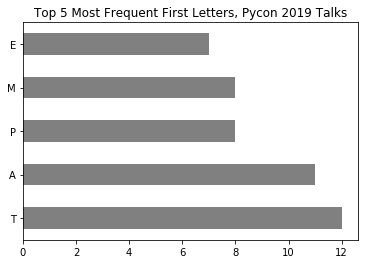

In [72]:
%matplotlib inline

(df['first letter']
    .value_counts()
    .head(5)
    .plot
    .barh(
    color='grey',
    title='Top 5 Most Frequent First Letters, Pycon 2019 Talks'));

Histogram of title lengths, in characters

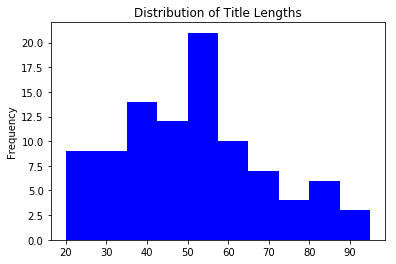

In [75]:
(df['title character count']
     .plot
     .hist(
         color='b',
         title='Distribution of Title Lengths'));

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [77]:
results.text

'<!doctype html>\n<html>\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2019 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/slight.673caeca693d.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" type="text/css" href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/simple-grid.d1149de00d41.css"/>\n\n\n\n    <meta property="og:image" content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" />\n    <link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon" />\n    

In [84]:
descriptions = soup.select('.presentation-description')
print(descriptions)

[<div class="presentation-description">Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.</div>, <div class="presentation-description">We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. 

In [87]:
first = descriptions[0]
first.text.strip()

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [89]:
last = descriptions[-1].text.strip()
last.replace('\r\n\r\n', ' ')

"Time zones are complicated, but they are a fact of engineering life. Time zones have [skipped entire days](http://www.bbc.com/news/world-asia-16351377) and repeated others. There are time zones that switch to [DST twice per year](https://www.timeanddate.com/time/zone/morocco/casablanca). But not necessarily every year.  In Python it's even possible to create datetimes with non-transitive equality (`a == b`, `b == c`, `a != c`). In this talk you'll learn about Python's time zone model and other concepts critical to avoiding datetime troubles. Using `dateutil` and `pytz` as examples, this talk covers how to deal with ambiguous and imaginary times, datetime arithmetic around a Daylight Savings Time transition, and datetime's new `fold` attribute, introduced in Python 3.6 ([PEP 495](https://www.python.org/dev/peps/pep-0495/))."

In [97]:
descs = []
for desc in soup.select('.presentation-description'):
    desc = desc.text.strip()
    desc = desc.replace('\r\n\r\n', ' ')
    descs.append(desc)

descs

["Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start? BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper. This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 'We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol 

In [102]:
type(descs), len(descs)

(list, 95)

In [103]:
# Add presentation descriptions to dataframe
df['description'] = descs
df.head()

,title,title character count,long title,first letter,title word count,description
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe..."
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ..."
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa..."
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo..."


In [106]:
textstat.lexicon_count(df['description'][0])

135

In [107]:
# Add description word count column
df['description word count'] = df['description'].apply(textstat.lexicon_count)
df.head()

,title,title character count,long title,first letter,title word count,description,description word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",135
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",56
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",66
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,84
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",96


In [109]:
# Add description character count column

df['description character count'] = df['description'].apply(len)
df.head()

,title,title character count,long title,first letter,title word count,description,description word count,description character count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",135,760
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",56,296
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",66,426
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,84,504
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",96,644


In [110]:
# Describing the dataframe's columns. 
df.describe()

,title character count,title word count,description word count,description character count
count,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,130.821053,808.526316
std,17.729509,3.218890,64.357872,412.511969
min,20.000000,2.000000,20.000000,121.000000
25%,37.000000,6.000000,85.500000,539.500000
50%,52.000000,7.000000,116.000000,718.000000
75%,62.000000,9.500000,165.000000,1010.500000
max,95.000000,19.000000,421.000000,2818.000000


 - The presentation description's mean word count is approximately 131 words.
 - The minimum presentation description's word count is 20 words and the maximum is 421 words. 

In [112]:
df.describe(exclude='number')

,title,long title,first letter,description
count,95,95,95,95
unique,95,2,22,95
top,Lowering the Stakes of Failure with Pre-mortems and Post-mortems,False,T,"GraphQL is an exciting technology that can help simplify web logic. Most of the attention has been focused on client-side improvements, such as reducing payload sizes and reducing total number of ..."
freq,1,87,12,1


In [115]:
# Check to see which presentation descriptions would fit in a tweet (less than 280 characters)
df[ df['description character count'] <= 280 ]

,title,title character count,long title,first letter,title word count,description,description word count,description character count
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",20,121


In [118]:
df['description'][70]

'In the month of August 2018, Kerala, the southernmost state of India, received 250 % of normal rainfall, resulting in all of its 44 dams to be opened. Over 483 people died due to the flooding caused by the opening of dams and a million people were evacuated.  I started a website ([keralarescue.in][1]), written in Django. The main purpose of the site was effective collaboration and communication between authorities, volunteers and public. The site was open source from Day 0. About 1500 developers and volunteers onboard our slack group in a couple of days. Within a week, the community united to forge a critical piece of software that saved thousands of lives. The site initiated as a portal for refugees to request essential resources like food and water and for volunteers to see their needs, all sorted by geographical location. Additionally, we provided direct information for the government and became the official website later on. The Minimum Viable Product was delivered in fourteen hou

In [121]:
df['description grade level'] = df['description'].apply(textstat.flesch_kincaid_grade)

df.head()

,title,title character count,long title,first letter,title word count,description,description word count,description character count,description grade level
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",135,760,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",56,296,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",66,426,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,84,504,17.3
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",96,644,9.5


In [122]:
df['description'][2]

'Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index.'

In [128]:
df.describe()

,title character count,title word count,description word count,description character count,description grade level
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,130.821053,808.526316,14.288421
std,17.729509,3.218890,64.357872,412.511969,7.300843
min,20.000000,2.000000,20.000000,121.000000,5.600000
25%,37.000000,6.000000,85.500000,539.500000,10.350000
50%,52.000000,7.000000,116.000000,718.000000,12.000000
75%,62.000000,9.500000,165.000000,1010.500000,16.150000
max,95.000000,19.000000,421.000000,2818.000000,48.900000


In [129]:
df[ df['description grade level'] > 16 ]

,title,title character count,long title,first letter,title word count,description,description word count,description character count,description grade level
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,84,504,17.3
7,A New Era in Python Governance,30,False,A,6,"In July of 2018, Guido van Rossum stepped down as “Benevolent Dictator for Life” of Python. In December, Python core developers voted on a new governance structure to guide Python going forward. ...",107,670,25.3
18,"But, Why is the (Django) Admin Slow?",36,False,B,7,"The admin interface that comes built-in with Django is one of the most-loved (and oft-abused) features. However, early converts are often disappointed to find that the admin doesn't seem to be sc...",127,792,19.8
19,Coded Readers: Using Python to uncover surprising patterns in the books you love,80,False,C,13,"We may not always know why we feel a certain way about a great story. In this talk, you'll learn how Python generates new insights into the stories you love. See how some straightforward tools a...",145,858,30.4
23,Django Channels in practice,27,False,D,4,Django Channels allows developers to make real-time web applications using websockets while maintaining access to the full Django batteries-included model for web applications. This talk will focu...,61,410,17.5
24,Does remote work really work?,29,False,D,5,"Spoiler alert: yes, remote work really does work! With nearly nine years of experience as a remote employee across three different companies, [SPEAKER] knows the ups and downs of remote work. In...",133,782,28.0
28,Ensuring Safe Water Access with Python and Machine Learning,59,False,E,9,"Millions of people across the world live in a state of acute and immediate environmental crisis caused by the lack of access to safe and usable water resources, because of natural disasters, socio...",159,1023,20.0
29,Escape from auto-manual testing with Hypothesis!,48,False,E,6,"If we knew all of the bugs we needed to write tests for, wouldn't we just... not write the bugs? So how can testing find bugs that nobody would think of? The answer is to have a computer *write y...",206,1143,21.0
34,Fighting Climate Change with Python,35,False,F,5,"Methane, the primary component of natural gas, is a 60 times more powerful climate change agent than carbon dioxide. Current technologies for finding methane leaks in oil and gas infrastructure r...",114,756,48.9
39,Getting to Three Million Lines of Type-Annotated Python,55,False,G,8,"Dropbox is a heavy user of the mypy type checker, recently passing three million lines of type-annotated Python code, with over half of that added in 2018. Type checking is helping find bugs, maki...",144,871,16.2


In [130]:
import matplotlib.pyplot as plt

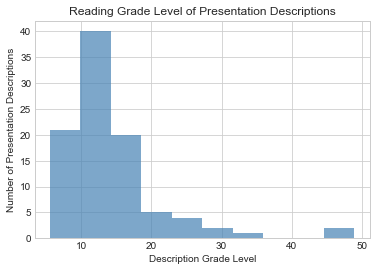

In [138]:
plt.style.use('seaborn-whitegrid')
ax = plt.axes()

ax.hist(df['description grade level'],
             alpha=0.7,
             histtype='stepfilled',
             color='steelblue',
             edgecolor='none')

ax.set(
    xlabel='Description Grade Level',
    ylabel='Number of Presentation Descriptions',
    title='Reading Grade Level of Presentation Descriptions');

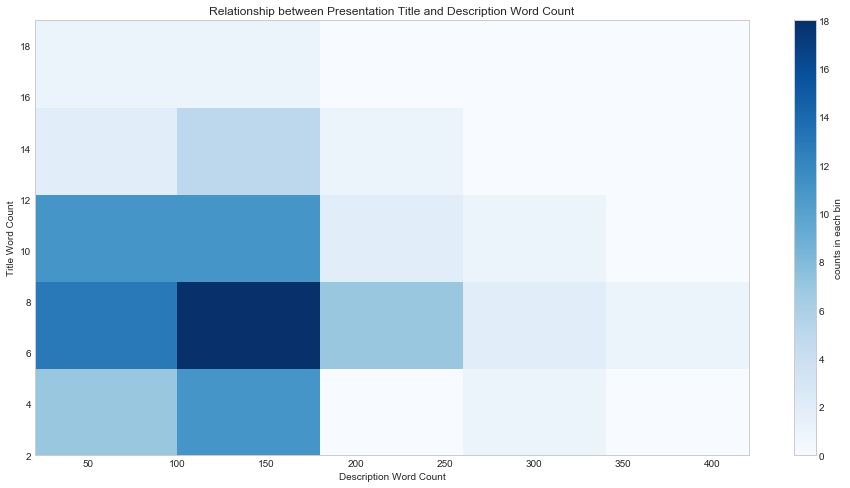

In [157]:
fig = plt.subplots(figsize=(16,8))
ax = plt.axes()

plt.hist2d(
    df['description word count'],
    df['title word count'],
    bins=5, 
    cmap='Blues'
)

ax.set(
    xlabel='Description Word Count',
    ylabel='Title Word Count',
    title='Relationship between Presentation Title and Description Word Count'
)

cb = plt.colorbar()
cb.set_label('counts in each bin')

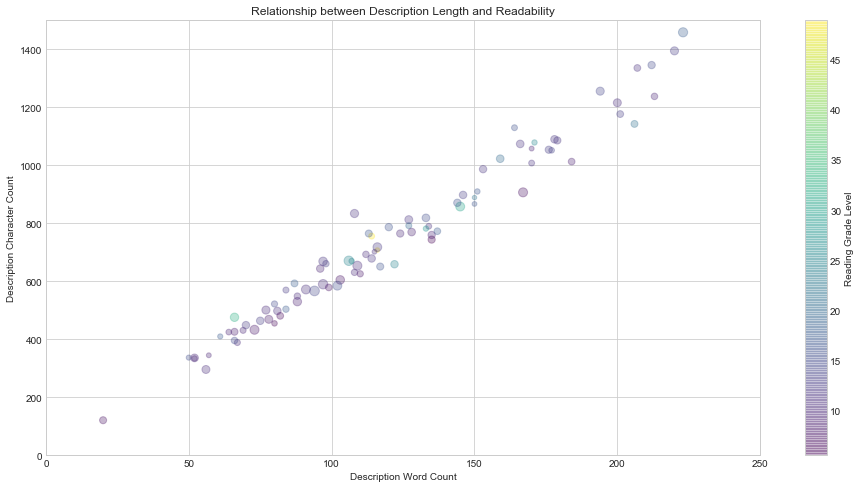

In [217]:
fig = plt.subplots(figsize=(16,8))
ax = plt.axes()

plt.scatter(
    df['description word count'], 
    df['description character count'],
    c=df['description grade level'],
    s=df['title character count'],
    alpha=0.3,
    cmap='viridis'
)

ax.set(
    xlabel='Description Word Count',
    ylabel='Description Character Count',
    title='Relationship between Description Length and Readability'
)
cb = plt.colorbar()
cb.set_label('Reading Grade Level')
plt.axis([0,250,0,1500])
plt.show()